In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
import numpy as np

2024-11-18 08:16:21.352877: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 08:16:21.367912: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 08:16:21.398056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731914181.440329 3794270 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731914181.452873 3794270 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
RSS0 = pd.read_csv("RSSI_0.csv")
RSS1 = pd.read_csv("RSSI_1.csv")
RSS2 = pd.read_csv("RSSI_2.csv")
RSS3 = pd.read_csv("RSSI_3.csv")
rssi_datasets = [RSS0, RSS1, RSS2, RSS3]
RSS0

,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,NaN.9,...,NaN.41,NaN.42,NaN.43,NaN.44,NaN.45,NaN.46,NaN.47,NaN.48,NaN.49,NaN.50
0,-59.725737,-59.565726,-59.402224,-59.235079,-59.090795,-58.915865,-58.736769,-58.553310,-58.365273,-58.172431,...,-40.316714,-38.842864,-37.440082,-36.177590,-35.930786,-36.057593,-36.386753,-36.982869,-37.680053,NaN
1,-62.864795,-62.707834,-62.499805,-62.334798,-62.166085,-61.993498,-61.816860,-61.635980,-61.450656,-61.260668,...,-41.718181,-40.052291,-37.815059,-35.822309,-34.895363,-34.988979,-35.515064,-36.225631,-37.588934,NaN
2,-61.294216,-61.135160,-59.394452,-59.226864,-59.055489,-58.880158,-58.700689,-58.516892,-58.328559,-58.135471,...,-39.664414,-38.781607,-38.013255,-37.575112,-32.758729,-32.821782,-33.399928,-36.740865,-38.026355,NaN
3,-61.393138,-61.234277,-59.492554,-59.325155,-59.153981,-58.978865,-58.799627,-58.616077,-58.428010,-58.235210,...,-39.191853,-38.440780,-37.873343,-35.460216,-31.421450,-30.960219,-33.477658,-36.979989,-38.205301,NaN
4,-61.463496,-61.305463,-59.559556,-59.392964,-59.222653,-59.048459,-58.870209,-58.687720,-58.500794,-58.309222,...,-39.948115,-39.063993,-35.777984,-33.097767,-31.957389,-31.467770,-33.228794,-36.167660,-37.780413,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-68.433077,-69.233805,-69.705661,NaN,-72.442779,-69.029924,-66.875312,-66.715001,-68.002429,-66.205978,...,-56.474181,-59.494699,-59.376713,-59.268623,-59.238988,-59.245289,-59.240047,-60.335212,-60.368464,NaN
69,-69.397821,-69.237775,-69.613505,-72.730389,-69.201306,-67.616624,-66.892205,-68.735852,-66.085298,-66.230743,...,-56.582658,-59.602044,-59.484577,-59.376818,-59.347297,-59.353484,-59.347911,-60.441638,-60.473890,NaN
70,-69.400729,-71.035647,-72.914306,-72.613301,-67.881774,-68.334948,-66.940570,-68.751059,-66.410932,-66.286885,...,-56.689583,-59.707868,-59.590901,-59.483461,-59.454051,-59.460128,-59.454235,-60.546569,-60.577856,NaN
71,-71.296081,-74.354068,-72.896064,-69.383732,-68.504253,-68.353641,-68.929699,-66.838814,-68.228218,-62.269247,...,-56.794997,-59.812212,-59.695728,-59.588596,-59.559293,-59.565263,-60.604448,-60.627659,-60.680401,NaN


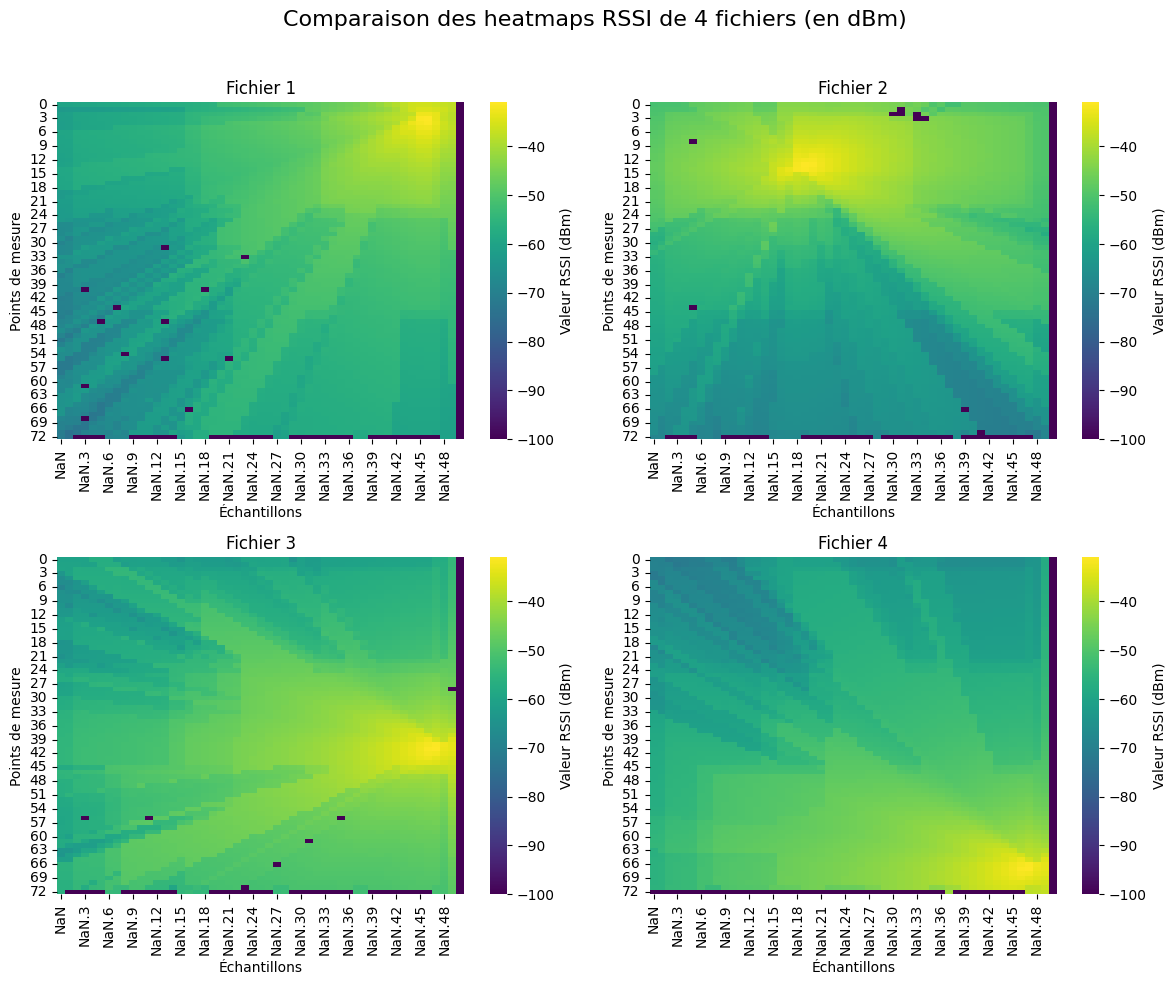

In [3]:
# Fonction pour tracer les heatmaps RSSI en échelle logarithmique d'un fichier donné
# Fonction pour tracer les courbes RSSI d'un fichier donné
def plot_rssi_data(file_path, ax, title):
    # Charger le fichier CSV
    rssi_data = pd.read_csv(file_path) 
    # Tracer chaque colonne comme une courbe séparée
    for col in rssi_data.columns:
        ax.plot(rssi_data[col])
    # Ajouter un titre et des labels aux axes
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Échantillons')
    ax.set_ylabel('Valeur RSSI (dBm)')
    ax.grid(True)
def plot_rssi_heatmap(file_path, ax, title):
    # Charger le fichier CSV et remplacer les valeurs infinies par NaN
    rssi_data = pd.read_csv(file_path).replace([np.inf, -np.inf], np.nan)
    # Remplacer les NaN avec une valeur minimale (ex. -100 dB pour indiquer un signal faible)
    rssi_data = rssi_data.fillna(-100)
    # Tracer le heatmap en utilisant directement les valeurs logarithmiques (dBm)
    sns.heatmap(rssi_data, ax=ax, cmap="viridis", cbar_kws={'label': 'Valeur RSSI (dBm)'})
    # Ajouter un titre et des labels aux axes
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Échantillons')
    ax.set_ylabel('Points de mesure')
# Chemins des 4 fichiers
file_paths = ['RSSI_0.csv','RSSI_1.csv','RSSI_2.csv','RSSI_3.csv']
# Création de la figure et des subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Titre global pour la figure
fig.suptitle('Comparaison des heatmaps RSSI de 4 fichiers (en dBm)', fontsize=16)
# Affichage des heatmaps des 4 fichiers dans les 4 subplots
plot_rssi_heatmap(file_paths[0], axs[0, 0], 'Fichier 1')
plot_rssi_heatmap(file_paths[1], axs[0, 1], 'Fichier 2')
plot_rssi_heatmap(file_paths[2], axs[1, 0], 'Fichier 3')
plot_rssi_heatmap(file_paths[3], axs[1, 1], 'Fichier 4')
# Ajustement de l'espacement
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Afficher le graphique
plt.show()

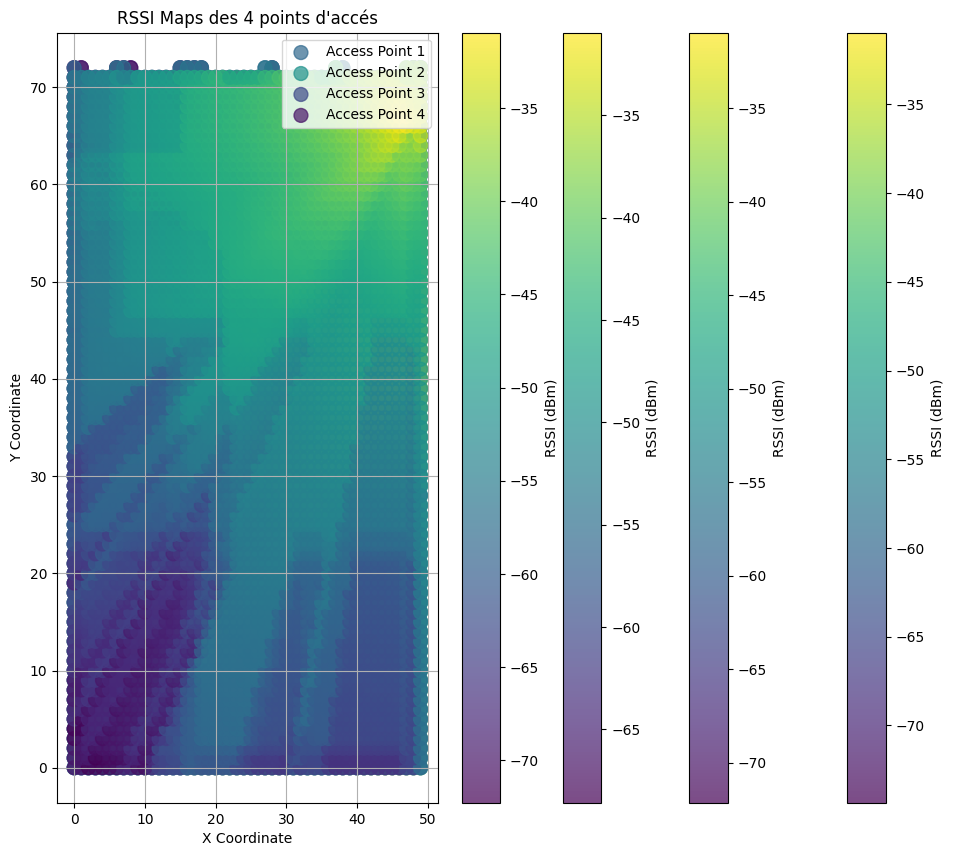

In [4]:
# Conversion function to reshape each RSSI dataset into a usable (x, y, RSSI) format
def convert_rssi_to_coordinates(rssi_data):
    # Reset NaN column names to sequential indices for ease of access
    rssi_data.columns = range(rssi_data.shape[1])
    rssi_grid = []
    # Loop over each cell in the grid to map it to coordinates (x, y) and RSSI value
    for y in range(rssi_data.shape[0]):
        for x in range(rssi_data.shape[1]):
            rssi_grid.append({'x': x, 'y': y, 'RSSI': rssi_data.iloc[y, x]})
    return pd.DataFrame(rssi_grid)
rssi_datasets = [RSS0, RSS1, RSS2, RSS3]  

rssi_datasets_converted = [convert_rssi_to_coordinates(data) for data in rssi_datasets]

# Suite du code pour la visualisation
plt.figure(figsize=(12, 10))

# Boucle pour afficher chaque carte RSSI
for i, rssi_data in enumerate(rssi_datasets_converted, start=1):
    plt.scatter(rssi_data['x'], rssi_data['y'], c=rssi_data['RSSI'], cmap='viridis', label=f'Access Point {i}', s=100, alpha=0.7)
    plt.colorbar(label='RSSI (dBm)', orientation='vertical')

# Détails du graphique
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("RSSI Maps des 4 points d'accés")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


In [5]:
def replace_missing_values_with_default(rssi_data, default_value):
    # Remplace les valeurs manquantes par la valeur par défaut
    for col in rssi_data.columns : 
        rssi_data[col] = rssi_data[col].fillna(default_value)
    return rssi_data

# Appliquer la méthode sur chaque jeu de données
default_value = -70  # Exemple de valeur par défaut pour les points manquants
rssi_datasets_completed_default = [replace_missing_values_with_default(data, default_value) for data in rssi_datasets]

RSS0

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-59.725737,-59.565726,-59.402224,-59.235079,-59.090795,-58.915865,-58.736769,-58.553310,-58.365273,-58.172431,...,-40.316714,-38.842864,-37.440082,-36.177590,-35.930786,-36.057593,-36.386753,-36.982869,-37.680053,-70.0
1,-62.864795,-62.707834,-62.499805,-62.334798,-62.166085,-61.993498,-61.816860,-61.635980,-61.450656,-61.260668,...,-41.718181,-40.052291,-37.815059,-35.822309,-34.895363,-34.988979,-35.515064,-36.225631,-37.588934,-70.0
2,-61.294216,-61.135160,-59.394452,-59.226864,-59.055489,-58.880158,-58.700689,-58.516892,-58.328559,-58.135471,...,-39.664414,-38.781607,-38.013255,-37.575112,-32.758729,-32.821782,-33.399928,-36.740865,-38.026355,-70.0
3,-61.393138,-61.234277,-59.492554,-59.325155,-59.153981,-58.978865,-58.799627,-58.616077,-58.428010,-58.235210,...,-39.191853,-38.440780,-37.873343,-35.460216,-31.421450,-30.960219,-33.477658,-36.979989,-38.205301,-70.0
4,-61.463496,-61.305463,-59.559556,-59.392964,-59.222653,-59.048459,-58.870209,-58.687720,-58.500794,-58.309222,...,-39.948115,-39.063993,-35.777984,-33.097767,-31.957389,-31.467770,-33.228794,-36.167660,-37.780413,-70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-68.433077,-69.233805,-69.705661,-70.000000,-72.442779,-69.029924,-66.875312,-66.715001,-68.002429,-66.205978,...,-56.474181,-59.494699,-59.376713,-59.268623,-59.238988,-59.245289,-59.240047,-60.335212,-60.368464,-70.0
69,-69.397821,-69.237775,-69.613505,-72.730389,-69.201306,-67.616624,-66.892205,-68.735852,-66.085298,-66.230743,...,-56.582658,-59.602044,-59.484577,-59.376818,-59.347297,-59.353484,-59.347911,-60.441638,-60.473890,-70.0
70,-69.400729,-71.035647,-72.914306,-72.613301,-67.881774,-68.334948,-66.940570,-68.751059,-66.410932,-66.286885,...,-56.689583,-59.707868,-59.590901,-59.483461,-59.454051,-59.460128,-59.454235,-60.546569,-60.577856,-70.0
71,-71.296081,-74.354068,-72.896064,-69.383732,-68.504253,-68.353641,-68.929699,-66.838814,-68.228218,-62.269247,...,-56.794997,-59.812212,-59.695728,-59.588596,-59.559293,-59.565263,-60.604448,-60.627659,-60.680401,-70.0


In [6]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=4))  # 32 neurones, première couche cachée de dimension 4 pour les bornes 
model.add(Dense(16, activation='relu')), #16 neurones, deuxiéme couche cachée 
model.add(Dense(8, activation='relu')),   # 8 neurones, troisiéme couche cachée
model.add(Dense(2))                                     # Couche de sortie pour (x, y)

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-18 08:19:47.958296: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842 (3.29 KB)

 Trainable params: 842 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step   - loss: 1199.6979 -
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1 - R2 train: -1.3413, R2 test: -1.2103
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 1198.4568 - mae: 28.5831 - val_loss: 905.7119 - val_mae: 23.3821
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step p - loss: 817.2733 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 2 - R2 train: -0.6095, R2 test: -0.6173
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 814.3655 - mae: 22.3325 - val_loss: 547.2698 - val_mae: 18.9374
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - loss: 444.3899 - m
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 3 - R2 train: 0.1346, R2 test: 0.1183
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 441.3490 - mae: 17.1595 - val_loss: 274.2102 - val_mae: 14.1846
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step p - loss: 235.6926 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 4 - R2 train: 0.2579, R2 test: 0.2582
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms

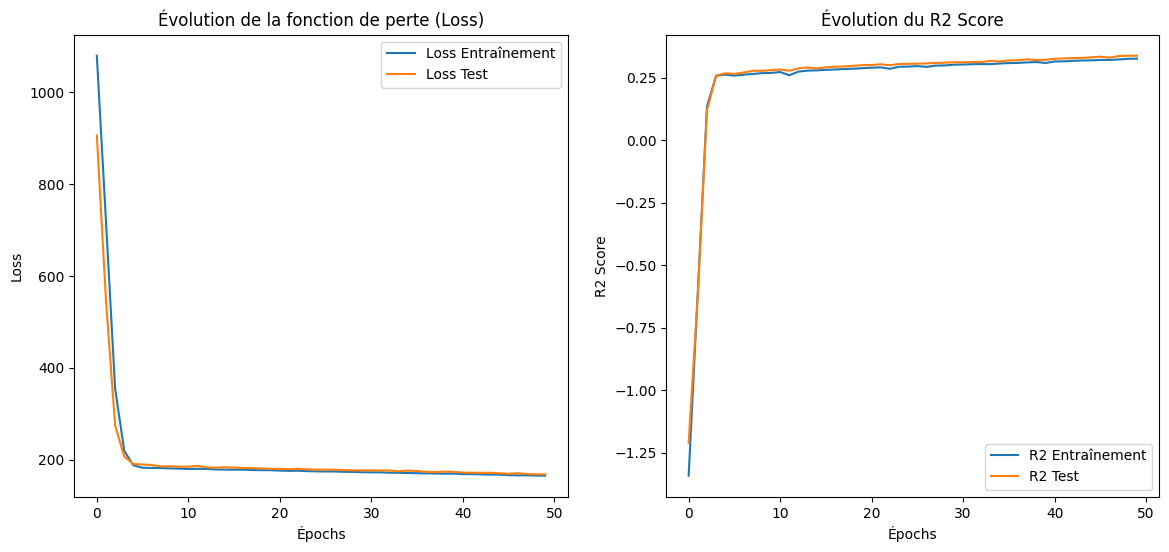

Test Accuracy: 10.014800071716309%


In [9]:
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.callbacks import Callback 
def transform_grid_to_points(df, label):
    # Conversion de la matrice en format long
    df_melted = df.reset_index().melt(id_vars=['index'], var_name='y', value_name=label)
    df_melted.rename(columns={'index': 'x'}, inplace=True)
    # Assurer que les colonnes 'x' et 'y' sont numériques
    df_melted['x'] = df_melted['x'].astype(int)
    df_melted['y'] = df_melted['y'].astype(int)
    return df_melted

# Transformation de chaque DataFrame
RSS0_transformed = transform_grid_to_points(RSS0, 'RSSI_0')
RSS1_transformed = transform_grid_to_points(RSS1, 'RSSI_1')
RSS2_transformed = transform_grid_to_points(RSS2, 'RSSI_2')
RSS3_transformed = transform_grid_to_points(RSS3, 'RSSI_3')

# Fusionner les DataFrames sur les colonnes 'x' et 'y'
data = RSS0_transformed.merge(RSS1_transformed, on=['x', 'y'], how='outer')
data = data.merge(RSS2_transformed, on=['x', 'y'], how='outer')
data = data.merge(RSS3_transformed, on=['x', 'y'], how='outer')


# Étape 3 : Remplacer les valeurs manquantes par une valeur par défaut (ex: -100)
data.fillna(-70, inplace=True)
# Préparation des données pour le modèle
X = data[['RSSI_0', 'RSSI_1', 'RSSI_2', 'RSSI_3']].values
y = data[['x', 'y']].values
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition du modèle de réseau de neurones
model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2)  # sortie x, y
])
# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Entraînement du modèle et sauvegarde de l'historique
#history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)
# Définir une classe de callback pour suivre le R2 score à chaque époque
class R2ScoreCallback(Callback):
    def __init__(self):
        super(R2ScoreCallback, self).__init__()
        self.r2_train = []
        self.r2_test = []
    
    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(X_train)
        y_test_pred = self.model.predict(X_test)
        
        # Calcul du R2 score pour les ensembles d'entraînement et de test
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Stockage des R2 scores pour traçage
        self.r2_train.append(r2_train)
        self.r2_test.append(r2_test)
        
        # Affichage des R2 scores pour chaque époque
        print(f"Epoch {epoch+1} - R2 train: {r2_train:.4f}, R2 test: {r2_test:.4f}")

# Instanciation du callback
r2_callback = R2ScoreCallback()

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[r2_callback])

# Tracé de l'évolution de la Loss et du R2 score
plt.figure(figsize=(14, 6))

# Courbes de Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss Entraînement')
plt.plot(history.history['val_loss'], label='Loss Test')
plt.title("Évolution de la fonction de perte (Loss)")
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.legend()

# Courbes de R2 score
plt.subplot(1, 2, 2)
plt.plot(r2_callback.r2_train, label='R2 Entraînement')
plt.plot(r2_callback.r2_test, label='R2 Test')
plt.title("Évolution du R2 Score")
plt.xlabel("Épochs")
plt.ylabel("R2 Score")
plt.legend()

plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


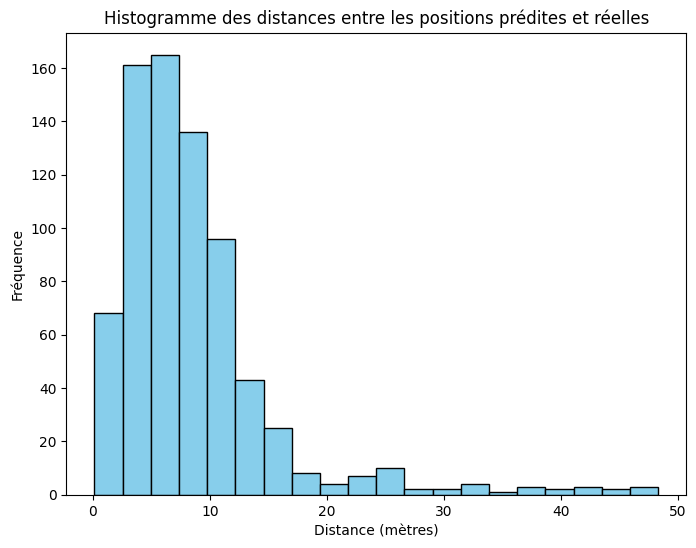

In [12]:
from sklearn.metrics import euclidean_distances

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des distances euclidiennes entre les prédictions et les valeurs réelles
distances = np.linalg.norm(y_test - y_pred, axis=1)

# Tracé de l'histogramme des distances
plt.figure(figsize=(8, 6))
plt.hist(distances, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogramme des distances entre les positions prédites et réelles")
plt.xlabel("Distance (mètres)")
plt.ylabel("Fréquence")
plt.show()


/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step   - loss: 117
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1 - R2 train: -2595.0743, R2 test: -2488.8258
187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 1165.1204 - mae: 28.5686 - val_loss: 280.6186 - val_mae: 13.8950
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step p - loss: 226.86
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 2 - R2 train: -2775.8964, R2 test: -2602.3320
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 226.4198 - mae: 12.1604 - val_loss: 160.9074 - val_mae: 10.3208
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step p - loss: 162.
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 3 - R2 train: -2679.5980, R2 test: -2481.0925
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 161.5600 - mae: 10.1248 - val_loss: 99.9540 - val_mae: 7.7225
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step p - loss: 111.6
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 4 - R2 train: -2634.3913, R2 test: -2423.8700
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 1

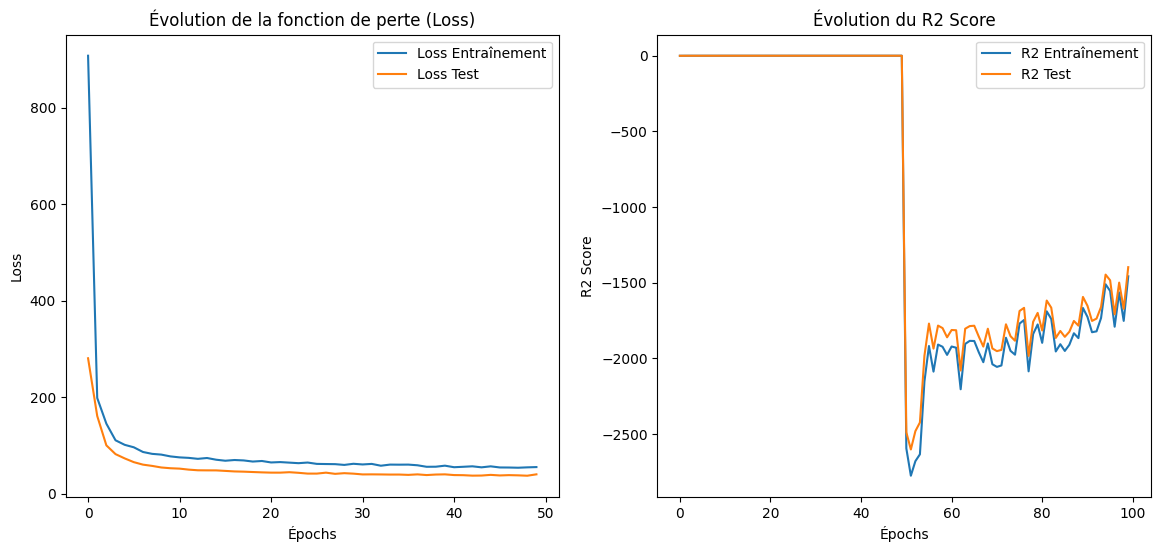

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler

# Normalisation des données RSSI
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition d'un modèle plus complexe avec régularisation et dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,), kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(8, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(2)  # Deux sorties pour (x, y)
])

# Compilation du modèle avec une fonction de coût et un taux d’apprentissage réduit
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Entraînement du modèle
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1, callbacks=[r2_callback])

# Tracé de l'évolution de la Loss et du R2 score (code déjà fourni précédemment)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss Entraînement')
plt.plot(history.history['val_loss'], label='Loss Test')
plt.title("Évolution de la fonction de perte (Loss)")
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(r2_callback.r2_train, label='R2 Entraînement')
plt.plot(r2_callback.r2_test, label='R2 Test')
plt.title("Évolution du R2 Score")
plt.xlabel("Épochs")
plt.ylabel("R2 Score")
plt.legend()
plt.show()
